In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('Portfolio Return Data Yearly.xlsx')

print(df)


    Date  Mulvaney Capital  Chesepeake Captial      AAPL      AMZN      MSFT  \
0   1999            0.0109              0.0330  1.086783  0.759411  0.576403   
1   2000            0.2451              0.0524 -0.778918 -1.073069 -0.829234   
2   2001            0.0669             -0.0799  0.577605  0.254382  0.518759   
3   2002            0.1937              0.1108 -0.305516  0.818570 -0.156824   
4   2003            0.2928              0.2307  0.467934  1.122446  0.108075   
5   2004           -0.0010              0.0484  1.184971 -0.081928  0.101910   
6   2005            0.3234             -0.0069  0.879475  0.126279  0.000831   
7   2006            0.2194              0.1088  0.238324 -0.095239  0.168840   
8   2007           -0.2314              0.0226  0.919658  0.980323  0.215126   
9   2008            1.0887              0.1539 -0.669397 -0.375576 -0.470191   
10  2009           -0.0590              0.0040  0.962334  1.096040  0.542341   
11  2010            0.3490              

In [19]:
import numpy as np

# Select the benchmark column
benchmark_column = df['^GSPC']

# Calculate the covariance between each column and the benchmark
covariances = df.cov()

# Calculate the variance of the benchmark
benchmark_variance = np.var(benchmark_column)

# Calculate the beta for each column
betas = covariances['^GSPC'] / benchmark_variance

# Display the beta for each column
print("Beta for Each Column:")
for column in df.columns[1:-2]:
    print(column, ":", betas[column])


Beta for Each Column:
Mulvaney Capital : -0.9331284144443546
Chesepeake Captial : -0.0038265048933066185
AAPL : 1.9614478262834165
AMZN : 1.3706939382546404
MSFT : 1.3535250711068199
BRK-B : 0.4665924816699416
GPK : 0.7758270803611746
XOM : 0.02293082059545094


In [22]:
from tabulate import tabulate

# Create a list of tuples with column names and beta values
beta_data = [(column, betas[column]) for column in df.columns[1:]]

# Display the beta values in a table
print("Beta for Each Column:")
print(tabulate(beta_data, headers=["Investment", "Beta"], tablefmt="table"))


Beta for Each Column:
Investment                Beta
------------------  ----------
Mulvaney Capital    -0.933128
Chesepeake Captial  -0.0038265
AAPL                 1.96145
AMZN                 1.37069
MSFT                 1.35353
BRK-B                0.466592
GPK                  0.775827
XOM                  0.0229308
^GSPC                1.04348
Portfolio            0.987381


In [2]:
import numpy as np

for column in df.columns[1:-1]:
    std_dev = df[column].std()
    print(f"Standard Deviation of {column}: {std_dev}")


Standard Deviation of Mulvaney Capital: 0.3402137026609317
Standard Deviation of Chesepeake Captial: 0.10242539278399923
Standard Deviation of AAPL: 0.5105593713591021
Standard Deviation of AMZN: 0.5337830284953746
Standard Deviation of MSFT: 0.3361021272763591
Standard Deviation of BRK-B: 0.158595578386145
Standard Deviation of GPK: 0.6205173876083824
Standard Deviation of XOM: 0.215227515709855


In [3]:

std_dev_dict = {
    'Mulvaney Capital': 0.3402137026609317,
    'Chesepeake Captial': 0.10242539278399923,
    'AAPL': 0.5105593713591021,
    'AMZN': 0.5337830284953746,
    'MSFT': 0.3361021272763591,
    'BRK-B': 0.158595578386145,
    'GPK': 0.6205173876083824,
    'XOM': 0.215227515709855,
    '^GSPC': 0.17359518785155711
}

std_dev_df = pd.DataFrame.from_dict(std_dev_dict, orient='index', columns=['Standard Deviation'])

print(std_dev_df)


fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
ax.axis('tight')

plt.savefig('std_dev.jpg')
plt.close()

                    Standard Deviation
Mulvaney Capital              0.340214
Chesepeake Captial            0.102425
AAPL                          0.510559
AMZN                          0.533783
MSFT                          0.336102
BRK-B                         0.158596
GPK                           0.620517
XOM                           0.215228
^GSPC                         0.173595


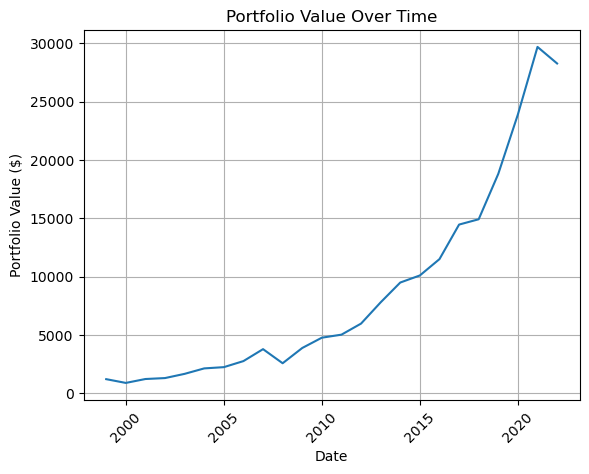

In [4]:
selected_columns = df[['Chesepeake Captial', 'AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK']]

weights = [0.15,.15,.1,.1,.4,.1]

weighted_columns = selected_columns.multiply(weights)

cc_portfolio_returns = weighted_columns.sum(axis=1)

df['Portfolio'] = cc_portfolio_returns

initial_investment = 1000

cc_portfolio_value = initial_investment * (1 + cc_portfolio_returns).cumprod()

plt.plot(df['Date'], cc_portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

cc_portfolio_returns_df = pd.DataFrame(cc_portfolio_returns, columns=['cc_portfolio_returns'])


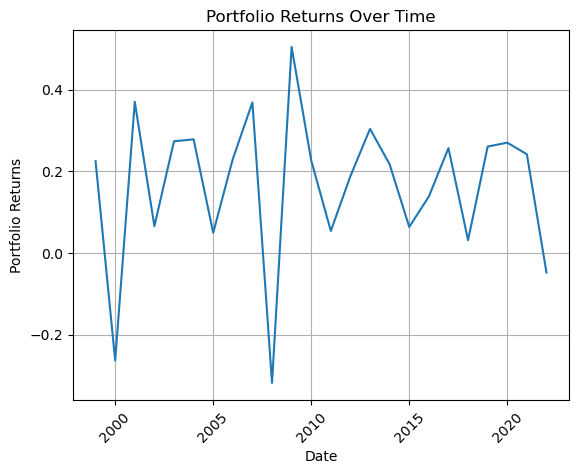

In [5]:

plt.plot(df['Date'], df['Portfolio'])
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Returns Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

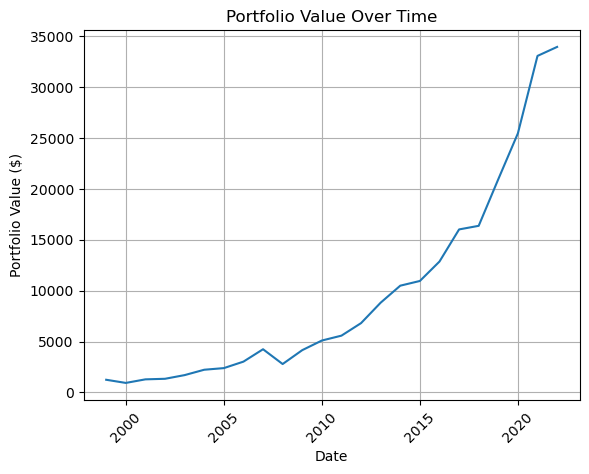

In [6]:
selected_column = df[['XOM', 'AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK']]

weights = [0.15,.15,.1,.1,.4,.1]

weighted_column = selected_column.multiply(weights)

xom_portfolio_return = weighted_column.sum(axis=1)

df['Portfolio'] = xom_portfolio_return

initial_investment = 1000

xom_portfolio_value = initial_investment * (1 + xom_portfolio_return).cumprod()

plt.plot(df['Date'], xom_portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

xom_portfolio_df = pd.DataFrame(xom_portfolio_return, columns=['xom_portfolio_return'])


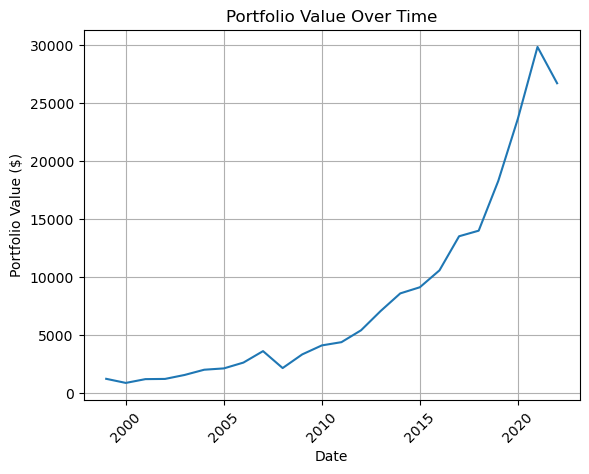

In [7]:
selected_column_mrk = df[['^GSPC', 'AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK']]

weights = [0.15,.15,.1,.1,.4,.1]

weighted_column_mrk = selected_column_mrk.multiply(weights)

portfolio_return_mrk = weighted_column_mrk.sum(axis=1)

df['Portfolio'] = portfolio_return_mrk

initial_investment = 1000

portfolio_value_mrk = initial_investment * (1 + portfolio_return_mrk).cumprod()

plt.plot(df['Date'], portfolio_value_mrk)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

portfolio_mrk_df = pd.DataFrame(portfolio_return_mrk, columns=['portfolio_return_mrk'])


In [8]:
print("Chesepeake Capital Portfolio") 
print(cc_portfolio_returns)
print("XOM Portfolio")
print(xom_portfolio_return)
print("Market Portfolio")
print(portfolio_return_mrk)

Chesepeake Capital Portfolio
0     0.224974
1    -0.263235
2     0.370382
3     0.065882
4     0.273770
5     0.278551
6     0.049681
7     0.230338
8     0.369046
9    -0.318125
10    0.504936
11    0.226672
12    0.054123
13    0.188519
14    0.304185
15    0.217275
16    0.063788
17    0.138487
18    0.257066
19    0.031479
20    0.260866
21    0.270359
22    0.242004
23   -0.047795
dtype: float64
XOM Portfolio
0     0.244338
1    -0.249023
2     0.374953
3     0.043023
4     0.269626
5     0.310215
6     0.071473
7     0.266273
8     0.402526
9    -0.342534
10    0.489194
11    0.227287
12    0.094100
13    0.220774
14    0.294889
15    0.189295
16    0.044087
17    0.174301
18    0.245410
19    0.022058
20    0.279886
21    0.215119
22    0.298790
23    0.026703
dtype: float64
Market Portfolio
0     0.249362
1    -0.283438
2     0.364826
3     0.014405
4     0.276473
5     0.285130
6     0.055942
7     0.233923
8     0.372767
9    -0.401429
10    0.541511
11    0.230881
12    0.06

In [9]:
chesapeake_avg_return = cc_portfolio_returns.mean()
xom_avg_return = xom_portfolio_return.mean()
market_avg_return = portfolio_return_mrk.mean()

# print the results
print("Chesapeake Capital Portfolio - Average Return: {:.2%}".format(chesapeake_avg_return))
print("XOM Portfolio - Average Return: {:.2%}".format(xom_avg_return))
print("Market Portfolio - Average Return: {:.2%}".format(market_avg_return))

Chesapeake Capital Portfolio - Average Return: 16.64%
XOM Portfolio - Average Return: 17.55%
Market Portfolio - Average Return: 16.87%


In [10]:
cc_volatility = cc_portfolio_returns.std()
xom_volatility = xom_portfolio_return.std()
market_volatility = portfolio_return_mrk.std()

print("Chesepeake Capital Portfolio Volatility:", cc_volatility)
print("XOM Portfolio Volatility:", xom_volatility)
print("Market Portfolio Volatility:", market_volatility)

Chesepeake Capital Portfolio Volatility: 0.18874227108788716
XOM Portfolio Volatility: 0.18973378524117843
Market Portfolio Volatility: 0.21047288926379157


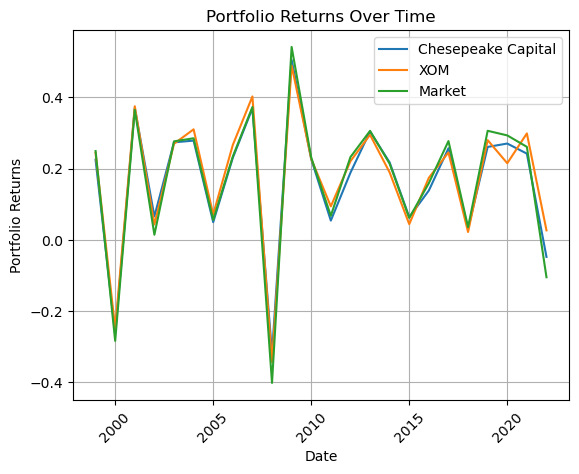

In [11]:
plt.plot(df['Date'], cc_portfolio_returns, label='Chesepeake Capital')
plt.plot(df['Date'], xom_portfolio_return, label='XOM')
plt.plot(df['Date'], portfolio_return_mrk, label='Market')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Returns Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))

# Save the figure as a JPG image
plt.savefig('Portfolio Returns Over Time.jpg', bbox_inches='tight', pad_inches=0.5)
plt.close()

### Risk Adjusted Return

In [15]:
# Calculate excess returns
risk_free_rate = 0.035  # Assuming a risk-free rate of 3%
excess_returns_cc = cc_portfolio_returns - risk_free_rate
excess_returns_xom = xom_portfolio_return - risk_free_rate
excess_returns_mrk = portfolio_return_mrk - risk_free_rate

# Calculate standard deviation of returns
std_dev_cc = np.std(cc_portfolio_returns)
std_dev_xom = np.std(xom_portfolio_return)
std_dev_mrk = np.std(portfolio_return_mrk)

# Calculate Sharpe ratio
sharpe_ratio_cc = excess_returns_cc / std_dev_cc
sharpe_ratio_xom = excess_returns_xom / std_dev_xom
sharpe_ratio_mrk = excess_returns_mrk / std_dev_mrk

# Display the risk-adjusted returns
print("Risk-Adjusted Returns:")
print("Chesepeake Capital:")
print(sharpe_ratio_cc)
print("XOM:")
print(sharpe_ratio_xom)
print("Market:")
print(sharpe_ratio_mrk)


Risk-Adjusted Returns:
Chesepeake Capital:
0     1.028174
1    -1.614102
2     1.815151
3     0.167138
4     1.292266
5     1.318140
6     0.079458
7     1.057205
8     1.807919
9    -1.911176
10    2.543380
11    1.037362
12    0.103497
13    0.830872
14    1.456878
15    0.986508
16    0.155808
17    0.560091
18    1.201863
19   -0.019059
20    1.222427
21    1.273809
22    1.120342
23   -0.448104
dtype: float64
XOM:
0     1.127054
1    -1.529152
2     1.830274
3     0.043193
4     1.263201
5     1.481732
6     0.196368
7     1.245152
8     1.978722
9    -2.032606
10    2.445336
11    1.035252
12    0.318186
13    1.000190
14    1.399218
15    0.830710
16    0.048923
17    0.749982
18    1.132827
19   -0.069676
20    1.318442
21    0.969744
22    1.420219
23   -0.044671
dtype: float64
Market:
0     1.040385
1    -1.545507
2     1.600777
3    -0.099956
4     1.171963
5     1.213979
6     0.101639
7     0.965449
8     1.639315
9    -2.118160
10    2.458299
11    0.950689
12    0.158526

In [16]:
average_sharpe_ratio_cc = np.mean(sharpe_ratio_cc)
average_sharpe_ratio_xom = np.mean(sharpe_ratio_xom)
average_sharpe_ratio_mrk = np.mean(sharpe_ratio_mrk)

print("Average Sharpe Ratio - Chesepeake Capital:", average_sharpe_ratio_cc)
print("Average Sharpe Ratio - XOM:", average_sharpe_ratio_xom)
print("Average Sharpe Ratio - Market:", average_sharpe_ratio_mrk)

Average Sharpe Ratio - Chesepeake Capital: 0.7110770450360472
Average Sharpe Ratio - XOM: 0.7566091389542934
Average Sharpe Ratio - Market: 0.6489776321077089


In [26]:
cc_beta = np.cov(cc_portfolio_returns, benchmark_column)[0, 1] / np.var(benchmark_column)

xom_beta = np.cov(xom_portfolio_return, benchmark_column)[0, 1] / np.var(benchmark_column)

mrk_beta = np.cov(portfolio_return_mrk, benchmark_column)[0, 1] / np.var(benchmark_column)

print("Beta of Portfolio Returns Compared to the Market:")
print("Chesepeake Capital Portfolio:", cc_beta)
print("XOM Portfolio:", xom_beta)
print("Market Portfolio:", mrk_beta)


Beta of Portfolio Returns Compared to the Market:
Chesepeake Capital Portfolio: 0.8302847998487566
XOM Portfolio: 0.8342983986720703
Market Portfolio: 0.9873805147131872
